# Guide Project 4
We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
import pandas as pd

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


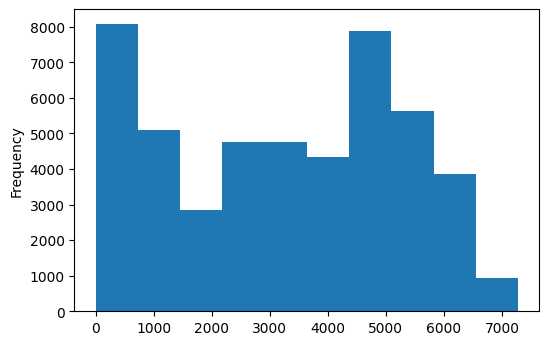

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()
plt.show()


In [3]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [4]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
#Save separate day and night hours (all dataframe). Inside the each DF are traffic volume
#per hour
day = traffic[(traffic['date_time'].dt.hour>=7) & (traffic['date_time'].dt.hour<19)]
night = traffic[(traffic['date_time'].dt.hour>=19) | (traffic['date_time'].dt.hour<7)]
                                                            

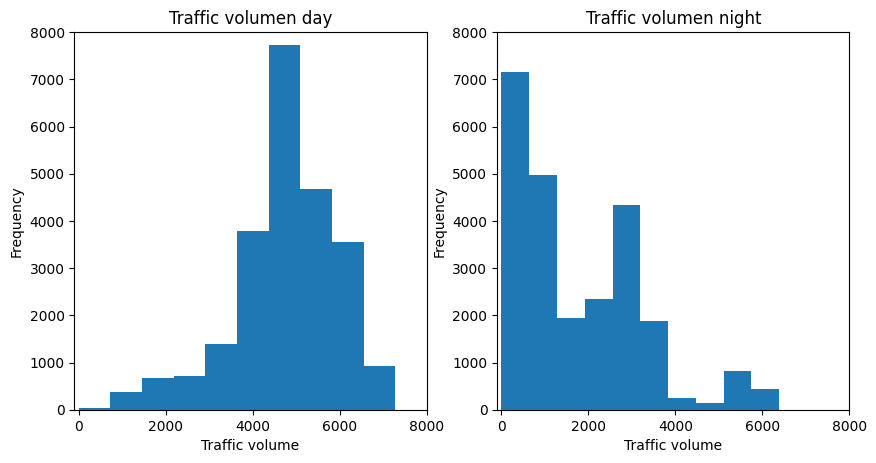

In [5]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(day['traffic_volume'])
plt.title('Traffic volumen day')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(-100,8000)
plt.ylim(0,8000)

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic volumen night')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(-100,8000)
plt.ylim(0,8000)
plt.show()

In [6]:
day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low

In [8]:
#Filter the traffic volumen day by month
day['month'] = day['date_time'].dt.month
#Save the mean in each value. Did the mean of each column by month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-8-67b675642321>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

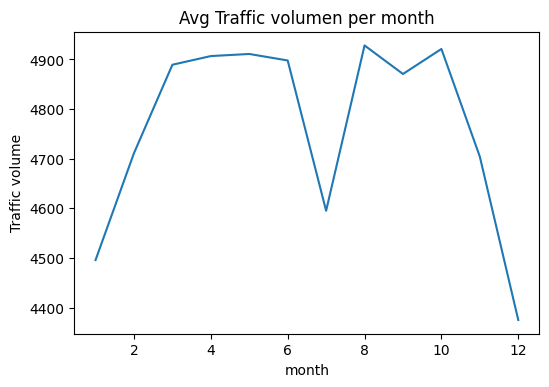

In [9]:
plt.plot(by_month['traffic_volume'])
plt.xlabel('month')
plt.ylabel('Traffic volume')
plt.title('Avg Traffic volumen per month')
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July.

In [10]:
#Create a column with day of the datatime from daytime DF
day['dayofweek'] = day['date_time'].dt.dayofweek
#Group by day of the week and make the mean of all value per column in new dataframe
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-10-70037dcee21b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

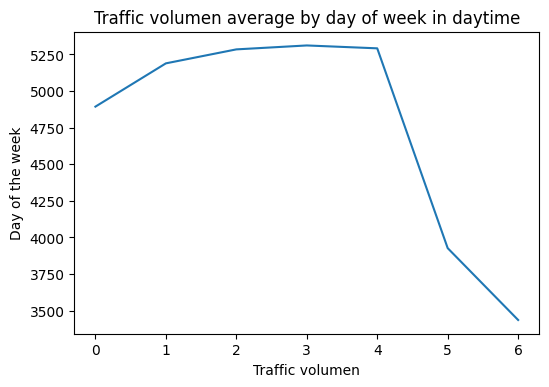

In [11]:
plt.plot(by_dayofweek['traffic_volume'])
plt.title('Traffic volumen average by day of week in daytime')
plt.xlabel('Traffic volumen')
plt.ylabel('Day of the week')
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

<ipython-input-12-256a03aa3c1f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(1000.0, 6500.0)

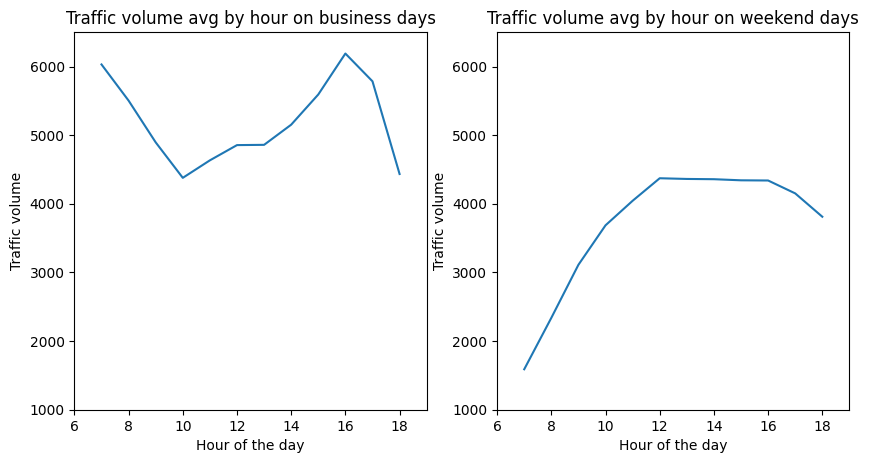

In [12]:
#Add to day DF the column hour
day['hour'] = day['date_time'].dt.hour
#Filter with mask business day of the week
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
#Filter with mask day of the weekend
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
#Make a DF with the average of columns for week and weekend days
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic volume avg by hour on business days')
plt.ylabel('Traffic volume')
plt.xlabel('Hour of the day')
plt.xlim(6,19)
plt.ylim(1000,6500)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic volume avg by hour on weekend days')
plt.ylabel('Traffic volume')
plt.xlabel('Hour of the day')
plt.xlim(6,19)
plt.ylim(1000,6500)

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to weekends.
On business days, the rush hours are around 7 and 16.

In [13]:
#Correlation of traffic volume with weather indicators
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. 

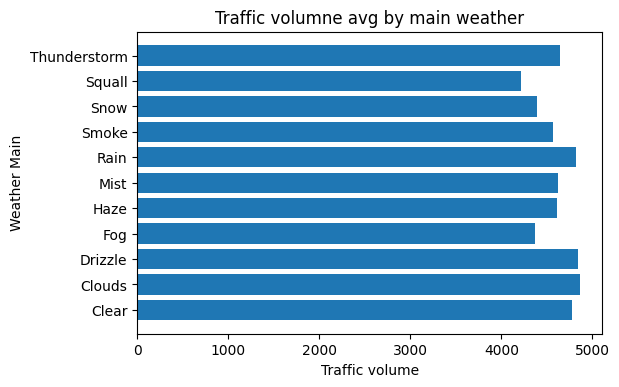

In [14]:
#Group by weather main and by weather description (both are cathegorical)
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()


plt.barh(by_weather_main.index, by_weather_main['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Weather Main')
plt.title('Traffic volumne avg by main weather')
plt.show()




It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult.


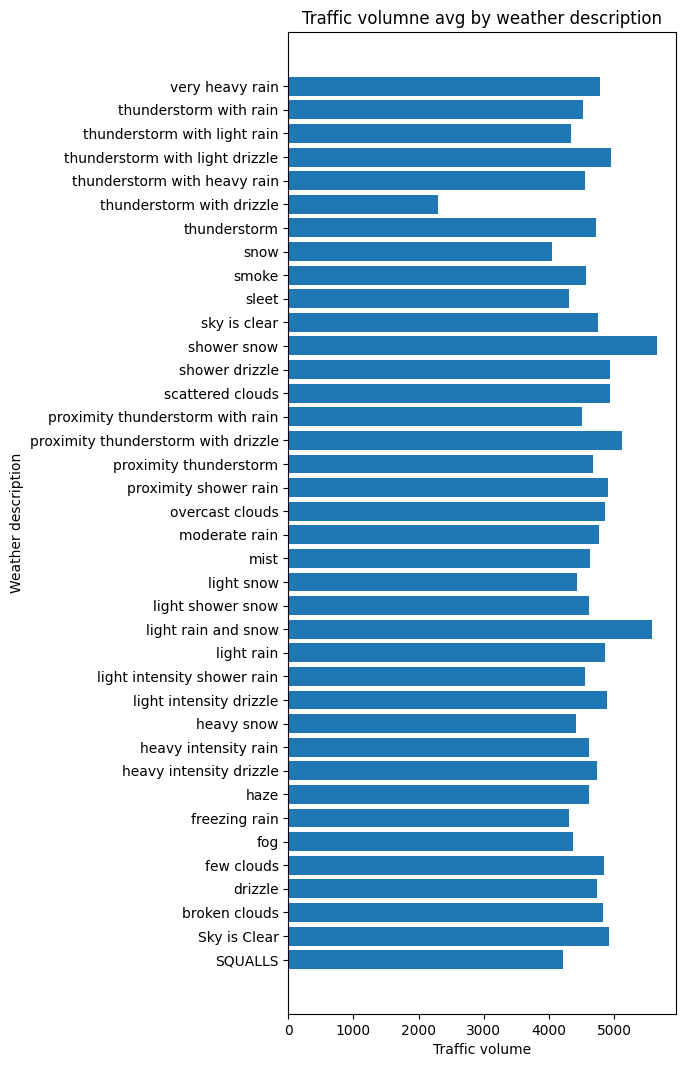

In [15]:
plt.figure(figsize=(5,13))
plt.barh(by_weather_description.index, by_weather_description['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Weather description')
plt.title('Traffic volumne avg by weather description')
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle